In [662]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
import re

In [685]:
df = pd.read_excel('Vaccine_PublicData.xlsx')

In [686]:
df.head()

,url,published,content,root_url,parent_url,extra_article_attributes.world_data.city,extra_author_attributes.name,extra_author_attributes.birthdate.date,extra_author_attributes.birthdate.resolution,extra_author_attributes.gender,...,reach,provider,generator.type,source_extended_attributes.alexa_unique_visitors,article_extended_attributes.twitter_likes,extra_author_attributes.description,article_extended_attributes.linkedin_shares,extra_source_attributes.name,word_count,rating
0,http://twitter.com/Benarasiyaa/status/13508842...,2021-01-18 00:44:48,RT @sadhika_tiwari: A 46-year-old dies after v...,http://twitter.com/Benarasiyaa/,http://twitter.com/sadhika_tiwari/status/13508...,Uttar Pradesh,Piyush Rai,0,DAY,MALE,...,16934,NaN,MOBILE_ANDROID,191844656,0,Journalist,0,Piyush Rai,16,NaN
1,http://twitter.com/SheelaPanicker/status/13511...,2021-01-18 20:21:12,RT @mid_day: #MiddayNews | Consent form for #C...,http://twitter.com/SheelaPanicker/,http://twitter.com/mid_day/status/135064655690...,New Delhi,Sheela Panicker,0,DAY,FEMALE,...,1406,NaN,MOBILE_OTHER,191844656,0,"#Entrepreneur, #Investor, #Marketer",0,Sheela Panicker,18,NaN
2,http://twitter.com/BDevangbhai/status/13508765...,2021-01-18 00:14:08,RT @Piyu_Nair: @Saltpistachio Covishield!,http://twitter.com/BDevangbhai/,http://twitter.com/Piyu_Nair/status/1350859429...,Maharashtra,Devangbhai B Patel,0,DAY,MALE,...,299,NaN,MOBILE_ANDROID,191844656,0,"HANSKAMAL TOWER, DONDAICHA",0,Devangbhai B Patel,4,NaN
3,http://twitter.com/firepaplu/status/1350996224...,2021-01-18 08:09:34,RT @TimesNow: #Breaking | Bharat Biotech to pa...,http://twitter.com/firepaplu/,http://twitter.com/TimesNow/status/13503814655...,Maharashtra,PAPLU DYNASTY ⚔️,0,DAY,FEMALE,...,1001,NaN,MOBILE_ANDROID,191844656,0,UPSC-CAPF aspirant..🇮🇳\nmy behavior is just li...,0,PAPLU DYNASTY ⚔️,18,NaN
4,http://twitter.com/Taraktogenos/status/1351110...,2021-01-18 15:41:42,RT @the_fauxy: After No Side Effect Of Covaxin...,http://twitter.com/Taraktogenos/,http://twitter.com/the_fauxy/status/1351069241...,Telangana,Taraktogenos,0,DAY,FEMALE,...,211,NaN,MOBILE_ANDROID,191844656,0,Ex-secular | Unapologetic Civilizational Hindu...,0,Taraktogenos,22,NaN


In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462 entries, 0 to 5461
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   url                                               5462 non-null   object        
 1   published                                         5462 non-null   datetime64[ns]
 2   content                                           5462 non-null   object        
 3   root_url                                          5462 non-null   object        
 4   parent_url                                        5462 non-null   object        
 5   extra_article_attributes.world_data.city          4640 non-null   object        
 6   extra_author_attributes.name                      5370 non-null   object        
 7   extra_author_attributes.birthdate.date            5462 non-null   int64         
 8   extra_author_attributes.birt

In [688]:
df.isnull().sum()

url                                                    0
published                                              0
content                                                0
root_url                                               0
parent_url                                             0
extra_article_attributes.world_data.city             822
extra_author_attributes.name                          92
extra_author_attributes.birthdate.date                 0
extra_author_attributes.birthdate.resolution           0
extra_author_attributes.gender                         0
extra_author_attributes.image_url                    775
extra_author_attributes.short_name                   775
extra_author_attributes.url                          772
extra_author_attributes.world_data.continent         775
extra_author_attributes.world_data.country           775
extra_author_attributes.world_data.country_code      775
extra_author_attributes.world_data.region            775
extra_author_attributes.world_d

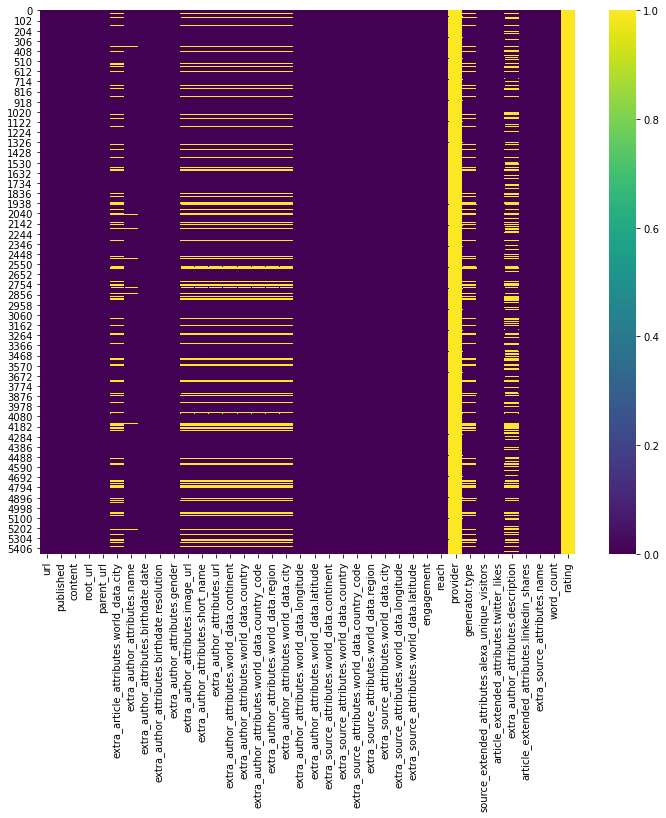

In [689]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cmap='viridis')

* first, we will get rid of all the columns that we don't need , for example the url column would have been used to extract the name but that we alreadt have in the extra_author_attributes.name column, hence we can drop it

In [690]:
df.drop(['url','root_url','parent_url','extra_author_attributes.birthdate.date','extra_author_attributes.birthdate.resolution','extra_author_attributes.image_url','extra_author_attributes.url','rating'], axis=1, inplace=True)

In [691]:
df['extra_author_attributes.world_data.country_code'].value_counts()

in    4687
Name: extra_author_attributes.world_data.country_code, dtype: int64

In [692]:
df['extra_author_attributes.world_data.continent'].value_counts()

Asia    4687
Name: extra_author_attributes.world_data.continent, dtype: int64

* it is obvious that the dataset is from india , therefore we can go ahead and drop the columns like continent , country , country code etc

In [693]:
df.drop(['extra_author_attributes.world_data.country_code','extra_author_attributes.world_data.continent','extra_author_attributes.world_data.country','provider'], inplace=True, axis=1)

In [694]:
df.head()

,published,content,extra_article_attributes.world_data.city,extra_author_attributes.name,extra_author_attributes.gender,extra_author_attributes.short_name,extra_author_attributes.world_data.region,extra_author_attributes.world_data.city,extra_author_attributes.world_data.longitude,extra_author_attributes.world_data.latitude,...,extra_source_attributes.world_data.latitude,engagement,reach,generator.type,source_extended_attributes.alexa_unique_visitors,article_extended_attributes.twitter_likes,extra_author_attributes.description,article_extended_attributes.linkedin_shares,extra_source_attributes.name,word_count
0,2021-01-18 00:44:48,RT @sadhika_tiwari: A 46-year-old dies after v...,Uttar Pradesh,Piyush Rai,MALE,Benarasiyaa,Uttar Pradesh,Uttar Pradesh,79.996948,26.001892,...,26.001892,0,16934,MOBILE_ANDROID,191844656,0,Journalist,0,Piyush Rai,16
1,2021-01-18 20:21:12,RT @mid_day: #MiddayNews | Consent form for #C...,New Delhi,Sheela Panicker,FEMALE,SheelaPanicker,Delhi,New Delhi,77.195435,28.600159,...,28.600159,0,1406,MOBILE_OTHER,191844656,0,"#Entrepreneur, #Investor, #Marketer",0,Sheela Panicker,18
2,2021-01-18 00:14:08,RT @Piyu_Nair: @Saltpistachio Covishield!,Maharashtra,Devangbhai B Patel,MALE,BDevangbhai,Maharashtra,Maharashtra,72.822876,18.959656,...,18.959656,0,299,MOBILE_ANDROID,191844656,0,"HANSKAMAL TOWER, DONDAICHA",0,Devangbhai B Patel,4
3,2021-01-18 08:09:34,RT @TimesNow: #Breaking | Bharat Biotech to pa...,Maharashtra,PAPLU DYNASTY ⚔️,FEMALE,firepaplu,Maharashtra,Maharashtra,72.822876,18.959656,...,18.959656,0,1001,MOBILE_ANDROID,191844656,0,UPSC-CAPF aspirant..🇮🇳\nmy behavior is just li...,0,PAPLU DYNASTY ⚔️,18
4,2021-01-18 15:41:42,RT @the_fauxy: After No Side Effect Of Covaxin...,Telangana,Taraktogenos,FEMALE,Taraktogenos,Andhra Pradesh,Telangana,78.997192,17.998352,...,17.998352,0,211,MOBILE_ANDROID,191844656,0,Ex-secular | Unapologetic Civilizational Hindu...,0,Taraktogenos,22


In [695]:
df['article_extended_attributes.linkedin_shares'].value_counts()

0    5462
Name: article_extended_attributes.linkedin_shares, dtype: int64

In [696]:
df.drop('article_extended_attributes.linkedin_shares',axis=1, inplace=True)

In [697]:
df['engagement'].value_counts()

0      4913
1       201
2        83
4        39
3        36
       ... 
145       1
243       1
97        1
49        1
129       1
Name: engagement, Length: 64, dtype: int64

In [698]:
df.isnull().sum()

published                                              0
content                                                0
extra_article_attributes.world_data.city             822
extra_author_attributes.name                          92
extra_author_attributes.gender                         0
extra_author_attributes.short_name                   775
extra_author_attributes.world_data.region            775
extra_author_attributes.world_data.city              775
extra_author_attributes.world_data.longitude           0
extra_author_attributes.world_data.latitude            0
extra_source_attributes.world_data.continent           0
extra_source_attributes.world_data.country             0
extra_source_attributes.world_data.country_code        0
extra_source_attributes.world_data.region              0
extra_source_attributes.world_data.city                0
extra_source_attributes.world_data.longitude           0
extra_source_attributes.world_data.latitude            0
engagement                     

In [699]:
df.shape

(5462, 25)

In [700]:
df['generator.type'].value_counts()

MOBILE_ANDROID      3034
MOBILE_OTHER         918
MOBILE_IOS           524
EXTERNAL_WEBSITE      81
PC                    60
BOT                   34
TABLET_IOS            33
Name: generator.type, dtype: int64

In [701]:
df['extra_author_attributes.description'].fillna('No Description',inplace=True)

In [702]:
df['generator.type'].fillna('No Description',inplace=True)

In [703]:
df.dropna(inplace=True)

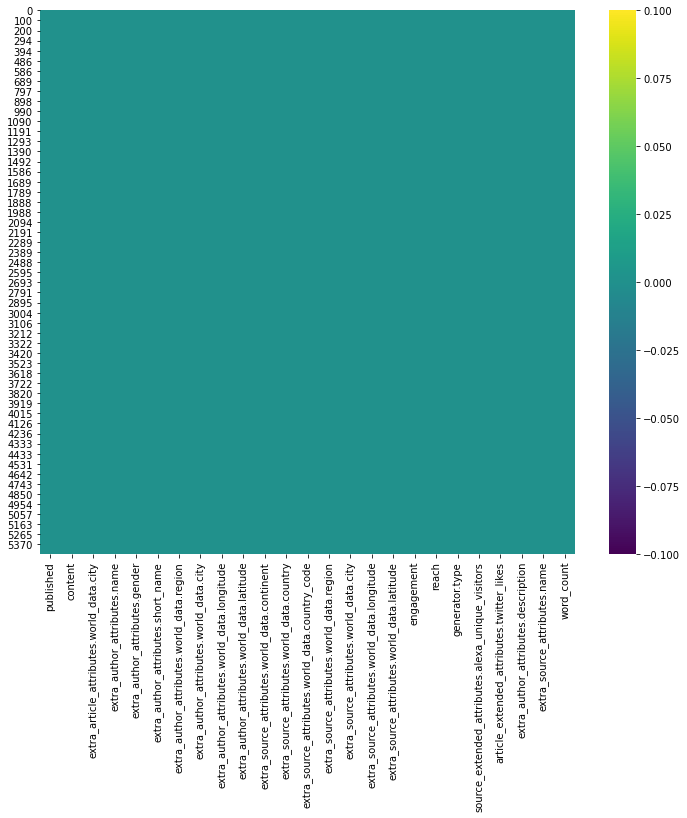

In [704]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cmap='viridis')

### Now we have handled the null values, let's move ahead!

Text(0.5, 1.0, 'Tweets Distribution across India')

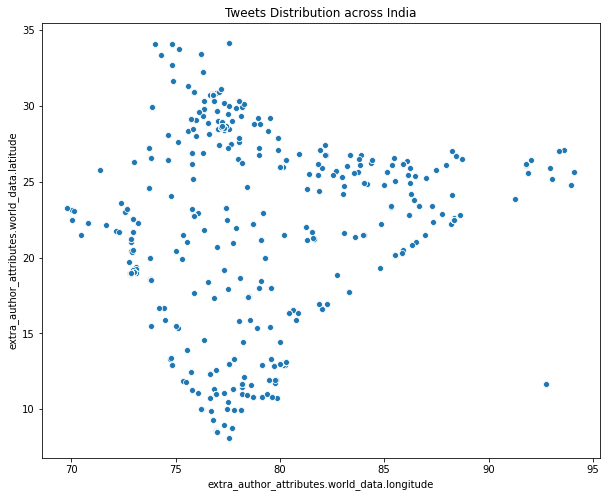

In [705]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='extra_author_attributes.world_data.longitude',y='extra_author_attributes.world_data.latitude', data=df)
plt.title('Tweets Distribution across India')

### Less Twitter activity around central India region as compared to Hotspots like Delhi/NCR , UP, Kerala and TamilNadu

In [706]:
df['extra_author_attributes.world_data.latitude'].value_counts()

28.600159    1903
19.014587     347
13.087463     249
28.671570     175
12.972107     150
             ... 
14.438782       1
26.122742       1
24.870300       1
22.228088       1
26.880798       1
Name: extra_author_attributes.world_data.latitude, Length: 293, dtype: int64

Text(0.5, 1.0, 'Tweets distribution across States')

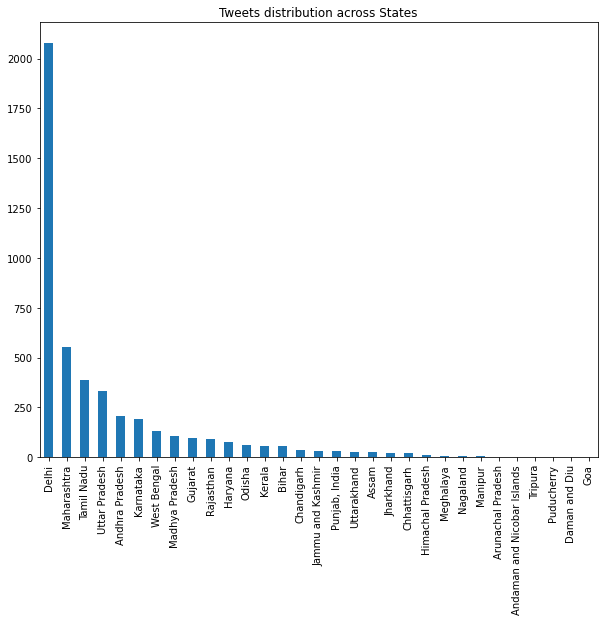

In [707]:
plt.figure(figsize=(10,8))
df['extra_author_attributes.world_data.region'].value_counts().plot(kind='bar')
plt.title('Tweets distribution across States')

* Delhi is by far the most active state when it comes to tweets on covid vaccine

Text(0, 0.5, 'Count of Device')

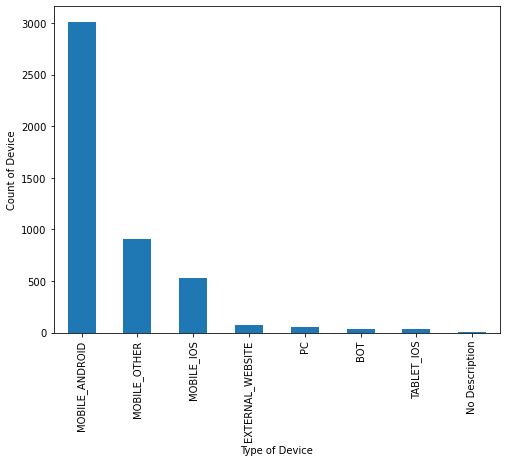

In [708]:
plt.figure(figsize=(8,6))
df['generator.type'].value_counts().plot(kind='bar')
plt.xlabel('Type of Device')
plt.ylabel('Count of Device')

### Way more people tweeted from their android phones than other devices

In [709]:
df['extra_source_attributes.name'].value_counts() > 10

Monica Sharma         True
Dr. Haryax Pathak     True
GreatGameIndia        True
Pinky                False
Bharat               False
                     ...  
OfbjpHamburg         False
kumar                False
Anantkumar           False
Nasir                False
𝐈𝐧𝐝𝐢𝐚 𝐀𝐰𝐚𝐤𝐞𝐧𝐞𝐝       False
Name: extra_source_attributes.name, Length: 3703, dtype: bool

#### Some of the most active users: 
* Monica Sharma
* Dr. Haryax Pathak
* GreatGameIndia

In [710]:
df['extra_author_attributes.gender'].value_counts()

MALE       3054
FEMALE      899
UNKNOWN     687
Name: extra_author_attributes.gender, dtype: int64

# Text Pre-Processing

In [711]:
def clean_tweet(tweet):
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    tweet = re.sub('RT', ' ', tweet)
    tweet = re.sub('https', ' ', tweet)
    tweet = re.sub('co', ' ', tweet)    
    tweet = re.sub(r"(?:\@|https?\://)\S+", "", tweet) # remove URL's and user profiles from tweets
    tweet = tweet.split()
    tweet = [word for word in tweet if not word in stopwords.words('english')]
    tweet = ' '.join(tweet)
    return tweet

In [712]:
df['tweet'] = df['content'].apply(clean_tweet)

In [713]:
df.head()

,published,content,extra_article_attributes.world_data.city,extra_author_attributes.name,extra_author_attributes.gender,extra_author_attributes.short_name,extra_author_attributes.world_data.region,extra_author_attributes.world_data.city,extra_author_attributes.world_data.longitude,extra_author_attributes.world_data.latitude,...,extra_source_attributes.world_data.latitude,engagement,reach,generator.type,source_extended_attributes.alexa_unique_visitors,article_extended_attributes.twitter_likes,extra_author_attributes.description,extra_source_attributes.name,word_count,tweet
0,2021-01-18 00:44:48,RT @sadhika_tiwari: A 46-year-old dies after v...,Uttar Pradesh,Piyush Rai,MALE,Benarasiyaa,Uttar Pradesh,Uttar Pradesh,79.996948,26.001892,...,26.001892,0,16934,MOBILE_ANDROID,191844656,0,Journalist,Piyush Rai,16,sadhika tiwari A year old dies vaccination Mur...
1,2021-01-18 20:21:12,RT @mid_day: #MiddayNews | Consent form for #C...,New Delhi,Sheela Panicker,FEMALE,SheelaPanicker,Delhi,New Delhi,77.195435,28.600159,...,28.600159,0,1406,MOBILE_OTHER,191844656,0,"#Entrepreneur, #Investor, #Marketer",Sheela Panicker,18,mid day MiddayNews Consent form Covaxin shot c...
2,2021-01-18 00:14:08,RT @Piyu_Nair: @Saltpistachio Covishield!,Maharashtra,Devangbhai B Patel,MALE,BDevangbhai,Maharashtra,Maharashtra,72.822876,18.959656,...,18.959656,0,299,MOBILE_ANDROID,191844656,0,"HANSKAMAL TOWER, DONDAICHA",Devangbhai B Patel,4,Piyu Nair Saltpistachio Covishield
3,2021-01-18 08:09:34,RT @TimesNow: #Breaking | Bharat Biotech to pa...,Maharashtra,PAPLU DYNASTY ⚔️,FEMALE,firepaplu,Maharashtra,Maharashtra,72.822876,18.959656,...,18.959656,0,1001,MOBILE_ANDROID,191844656,0,UPSC-CAPF aspirant..🇮🇳\nmy behavior is just li...,PAPLU DYNASTY ⚔️,18,TimesNow Breaking Bharat Biotech pay mpensatio...
4,2021-01-18 15:41:42,RT @the_fauxy: After No Side Effect Of Covaxin...,Telangana,Taraktogenos,FEMALE,Taraktogenos,Andhra Pradesh,Telangana,78.997192,17.998352,...,17.998352,0,211,MOBILE_ANDROID,191844656,0,Ex-secular | Unapologetic Civilizational Hindu...,Taraktogenos,22,fauxy After No Side Effect Of Covaxin Liberal ...


## Sentiment Analysis

In [714]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [715]:
from textblob import TextBlob

In [716]:
def sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    print(sentiment)
    neg = sentiment.get('neg')
    pos = sentiment.get('pos')
    neu = sentiment.get('neu')
    compound = sentiment.get('compound')
    return neg,pos,neu,compound

In [717]:
sentiment("i feel SAD!!") #example

{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.6616}


(0.688, 0.0, 0.312, -0.6616)

In [718]:
df['Sentiment Compund Score'] = df['tweet'].apply(lambda x:analyzer.polarity_scores(x).get('compound') )

In [719]:
df['Sentiment Category'] = df['Sentiment Compund Score'].apply(lambda x: 'pos' if x>0 else 'neg')

In [720]:
df.head()

,published,content,extra_article_attributes.world_data.city,extra_author_attributes.name,extra_author_attributes.gender,extra_author_attributes.short_name,extra_author_attributes.world_data.region,extra_author_attributes.world_data.city,extra_author_attributes.world_data.longitude,extra_author_attributes.world_data.latitude,...,reach,generator.type,source_extended_attributes.alexa_unique_visitors,article_extended_attributes.twitter_likes,extra_author_attributes.description,extra_source_attributes.name,word_count,tweet,Sentiment Compund Score,Sentiment Category
0,2021-01-18 00:44:48,RT @sadhika_tiwari: A 46-year-old dies after v...,Uttar Pradesh,Piyush Rai,MALE,Benarasiyaa,Uttar Pradesh,Uttar Pradesh,79.996948,26.001892,...,16934,MOBILE_ANDROID,191844656,0,Journalist,Piyush Rai,16,sadhika tiwari A year old dies vaccination Mur...,0.0000,neg
1,2021-01-18 20:21:12,RT @mid_day: #MiddayNews | Consent form for #C...,New Delhi,Sheela Panicker,FEMALE,SheelaPanicker,Delhi,New Delhi,77.195435,28.600159,...,1406,MOBILE_OTHER,191844656,0,"#Entrepreneur, #Investor, #Marketer",Sheela Panicker,18,mid day MiddayNews Consent form Covaxin shot c...,0.2263,pos
2,2021-01-18 00:14:08,RT @Piyu_Nair: @Saltpistachio Covishield!,Maharashtra,Devangbhai B Patel,MALE,BDevangbhai,Maharashtra,Maharashtra,72.822876,18.959656,...,299,MOBILE_ANDROID,191844656,0,"HANSKAMAL TOWER, DONDAICHA",Devangbhai B Patel,4,Piyu Nair Saltpistachio Covishield,0.0000,neg
3,2021-01-18 08:09:34,RT @TimesNow: #Breaking | Bharat Biotech to pa...,Maharashtra,PAPLU DYNASTY ⚔️,FEMALE,firepaplu,Maharashtra,Maharashtra,72.822876,18.959656,...,1001,MOBILE_ANDROID,191844656,0,UPSC-CAPF aspirant..🇮🇳\nmy behavior is just li...,PAPLU DYNASTY ⚔️,18,TimesNow Breaking Bharat Biotech pay mpensatio...,-0.1027,neg
4,2021-01-18 15:41:42,RT @the_fauxy: After No Side Effect Of Covaxin...,Telangana,Taraktogenos,FEMALE,Taraktogenos,Andhra Pradesh,Telangana,78.997192,17.998352,...,211,MOBILE_ANDROID,191844656,0,Ex-secular | Unapologetic Civilizational Hindu...,Taraktogenos,22,fauxy After No Side Effect Of Covaxin Liberal ...,-0.2960,neg


### We will be classifying 0 as negative factoring in the fact that in general most tweets are on the negative side of the spectrum

In [722]:
df.head(50)

,published,content,extra_article_attributes.world_data.city,extra_author_attributes.name,extra_author_attributes.gender,extra_author_attributes.short_name,extra_author_attributes.world_data.region,extra_author_attributes.world_data.city,extra_author_attributes.world_data.longitude,extra_author_attributes.world_data.latitude,...,reach,generator.type,source_extended_attributes.alexa_unique_visitors,article_extended_attributes.twitter_likes,extra_author_attributes.description,extra_source_attributes.name,word_count,tweet,Sentiment Compund Score,Sentiment Category
0,2021-01-18 00:44:48,RT @sadhika_tiwari: A 46-year-old dies after v...,Uttar Pradesh,Piyush Rai,MALE,Benarasiyaa,Uttar Pradesh,Uttar Pradesh,79.996948,26.001892,...,16934,MOBILE_ANDROID,191844656,0,Journalist,Piyush Rai,16,sadhika tiwari A year old dies vaccination Mur...,0.0000,neg
1,2021-01-18 20:21:12,RT @mid_day: #MiddayNews | Consent form for #C...,New Delhi,Sheela Panicker,FEMALE,SheelaPanicker,Delhi,New Delhi,77.195435,28.600159,...,1406,MOBILE_OTHER,191844656,0,"#Entrepreneur, #Investor, #Marketer",Sheela Panicker,18,mid day MiddayNews Consent form Covaxin shot c...,0.2263,pos
2,2021-01-18 00:14:08,RT @Piyu_Nair: @Saltpistachio Covishield!,Maharashtra,Devangbhai B Patel,MALE,BDevangbhai,Maharashtra,Maharashtra,72.822876,18.959656,...,299,MOBILE_ANDROID,191844656,0,"HANSKAMAL TOWER, DONDAICHA",Devangbhai B Patel,4,Piyu Nair Saltpistachio Covishield,0.0000,neg
3,2021-01-18 08:09:34,RT @TimesNow: #Breaking | Bharat Biotech to pa...,Maharashtra,PAPLU DYNASTY ⚔️,FEMALE,firepaplu,Maharashtra,Maharashtra,72.822876,18.959656,...,1001,MOBILE_ANDROID,191844656,0,UPSC-CAPF aspirant..🇮🇳\nmy behavior is just li...,PAPLU DYNASTY ⚔️,18,TimesNow Breaking Bharat Biotech pay mpensatio...,-0.1027,neg
4,2021-01-18 15:41:42,RT @the_fauxy: After No Side Effect Of Covaxin...,Telangana,Taraktogenos,FEMALE,Taraktogenos,Andhra Pradesh,Telangana,78.997192,17.998352,...,211,MOBILE_ANDROID,191844656,0,Ex-secular | Unapologetic Civilizational Hindu...,Taraktogenos,22,fauxy After No Side Effect Of Covaxin Liberal ...,-0.2960,neg
6,2021-01-18 11:27:01,"RT @LiveLawIndia: ""Covaxin Has Not Completed P...",New Delhi,Monica Sharma,FEMALE,Indian_ByChoice,Delhi,New Delhi,77.195435,28.600159,...,598,MOBILE_OTHER,191844656,0,"जो ग़लत को ग़लत ना कह सके, समझो मर चुका है।RTs...",Monica Sharma,24,LiveLawIndia Covaxin Has Not Completed Phase T...,0.4215,pos
7,2021-01-18 13:21:25,இந்தியாவிலேயே தமிழகத்தில்தான் கோவாக்சின் தடுப்...,New Delhi,Oneindia Tamil,UNKNOWN,thatsTamil,Delhi,New Delhi,77.195435,28.600159,...,487036,MOBILE_OTHER,191844656,11,ஒன்இந்தியா http://tamil.oneindia.com/ #தமிழ் இ...,Oneindia Tamil,23,CoronaVaccine Tamilnadu Covaxin,0.0000,neg
8,2021-01-17 21:24:51,RT @imSandipGunjal: दाभोळकरांचे संस्कार ! लस आ...,Nashik,Ravindra Aher-Patil.,MALE,RavindraAherPa2,Maharashtra,Nashik,73.778687,19.997864,...,238,MOBILE_ANDROID,191844656,0,( आदिनाथ. )\n\n\n\n\n\nThe Great MARAT...,Ravindra Aher-Patil.,24,imSandipGunjal Covaxin UPcKQeg BL,0.6166,pos
9,2021-01-18 17:46:25,"RT @svaradarajan: Last week, 49 scientists iss...",New Delhi,Sheev Malhar,MALE,SheevMalhar,Delhi,New Delhi,77.195435,28.600159,...,451,MOBILE_ANDROID,191844656,0,| आम्ही बळी राजाचे वंशज | सिंहाच्या जबड्यात घा...,Sheev Malhar,43,svaradarajan Last week scientists issued pro C...,0.4215,pos
10,2021-01-18 11:32:37,"RT @dwai_banerjee: In summary, take Covishield...",Bangalore,vrundashankara,FEMALE,vrundavs,Karnataka,Bangalore,77.557983,12.972107,...,2683,MOBILE_IOS,191844656,0,Mom/wife/doc/homemaker Living life at my own p...,vrundashankara,50,dwai banerjee In summary take Covishield also ...,0.5267,pos


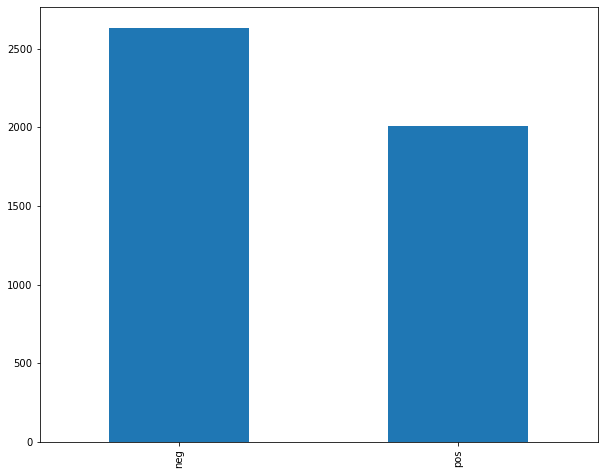

In [723]:
plt.figure(figsize=(10,8))
df['Sentiment Category'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'Sentiment distibution Across India')

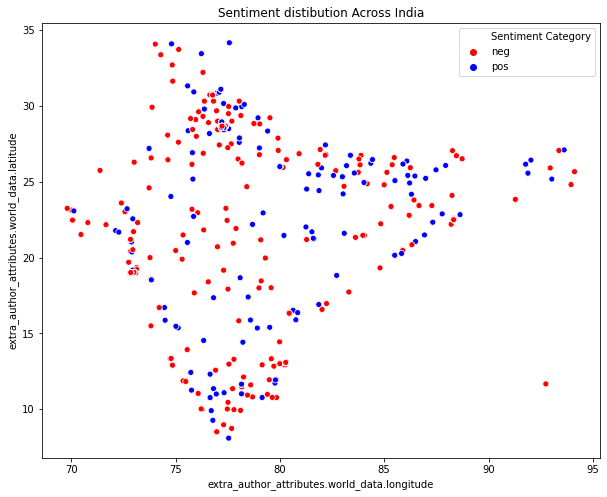

In [724]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='extra_author_attributes.world_data.longitude',y='extra_author_attributes.world_data.latitude', data=df, hue='Sentiment Category',  palette=['red','blue'])
plt.title('Sentiment distibution Across India')

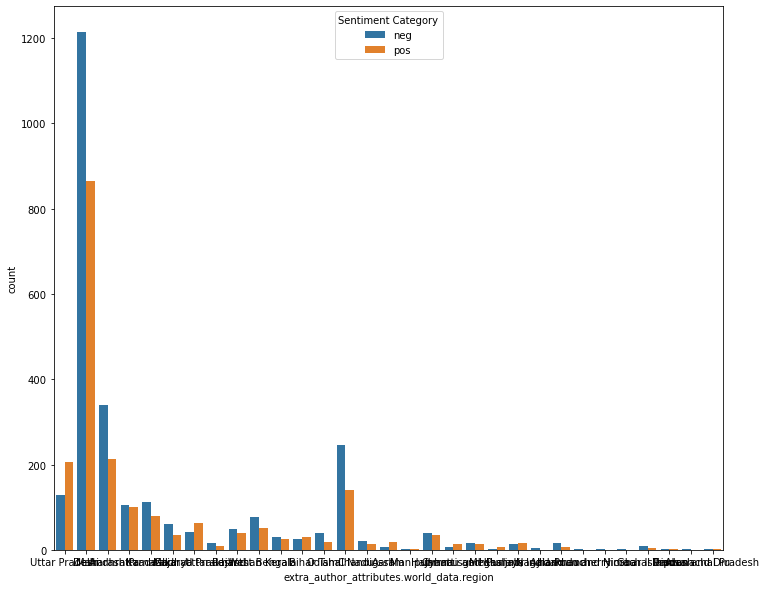

In [725]:
plt.figure(figsize=(12,10))
sns.countplot(x='extra_author_attributes.world_data.region', data=df, hue='Sentiment Category')

Text(0.5, 1.0, 'Gender-wise Sentiment Distribution')

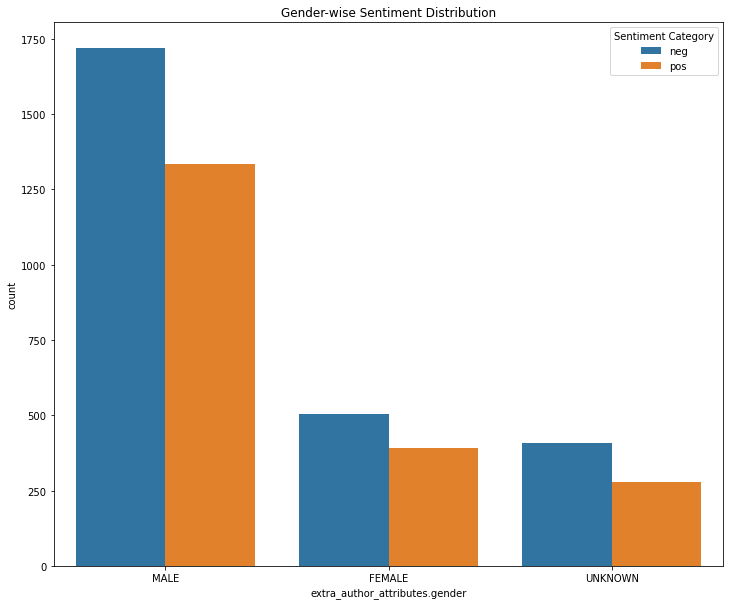

In [726]:
plt.figure(figsize=(12,10))
sns.countplot(x='extra_author_attributes.gender', data=df, hue='Sentiment Category')
plt.title('Gender-wise Sentiment Distribution')

In [727]:
df.head()

,published,content,extra_article_attributes.world_data.city,extra_author_attributes.name,extra_author_attributes.gender,extra_author_attributes.short_name,extra_author_attributes.world_data.region,extra_author_attributes.world_data.city,extra_author_attributes.world_data.longitude,extra_author_attributes.world_data.latitude,...,reach,generator.type,source_extended_attributes.alexa_unique_visitors,article_extended_attributes.twitter_likes,extra_author_attributes.description,extra_source_attributes.name,word_count,tweet,Sentiment Compund Score,Sentiment Category
0,2021-01-18 00:44:48,RT @sadhika_tiwari: A 46-year-old dies after v...,Uttar Pradesh,Piyush Rai,MALE,Benarasiyaa,Uttar Pradesh,Uttar Pradesh,79.996948,26.001892,...,16934,MOBILE_ANDROID,191844656,0,Journalist,Piyush Rai,16,sadhika tiwari A year old dies vaccination Mur...,0.0000,neg
1,2021-01-18 20:21:12,RT @mid_day: #MiddayNews | Consent form for #C...,New Delhi,Sheela Panicker,FEMALE,SheelaPanicker,Delhi,New Delhi,77.195435,28.600159,...,1406,MOBILE_OTHER,191844656,0,"#Entrepreneur, #Investor, #Marketer",Sheela Panicker,18,mid day MiddayNews Consent form Covaxin shot c...,0.2263,pos
2,2021-01-18 00:14:08,RT @Piyu_Nair: @Saltpistachio Covishield!,Maharashtra,Devangbhai B Patel,MALE,BDevangbhai,Maharashtra,Maharashtra,72.822876,18.959656,...,299,MOBILE_ANDROID,191844656,0,"HANSKAMAL TOWER, DONDAICHA",Devangbhai B Patel,4,Piyu Nair Saltpistachio Covishield,0.0000,neg
3,2021-01-18 08:09:34,RT @TimesNow: #Breaking | Bharat Biotech to pa...,Maharashtra,PAPLU DYNASTY ⚔️,FEMALE,firepaplu,Maharashtra,Maharashtra,72.822876,18.959656,...,1001,MOBILE_ANDROID,191844656,0,UPSC-CAPF aspirant..🇮🇳\nmy behavior is just li...,PAPLU DYNASTY ⚔️,18,TimesNow Breaking Bharat Biotech pay mpensatio...,-0.1027,neg
4,2021-01-18 15:41:42,RT @the_fauxy: After No Side Effect Of Covaxin...,Telangana,Taraktogenos,FEMALE,Taraktogenos,Andhra Pradesh,Telangana,78.997192,17.998352,...,211,MOBILE_ANDROID,191844656,0,Ex-secular | Unapologetic Civilizational Hindu...,Taraktogenos,22,fauxy After No Side Effect Of Covaxin Liberal ...,-0.2960,neg


In [728]:
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

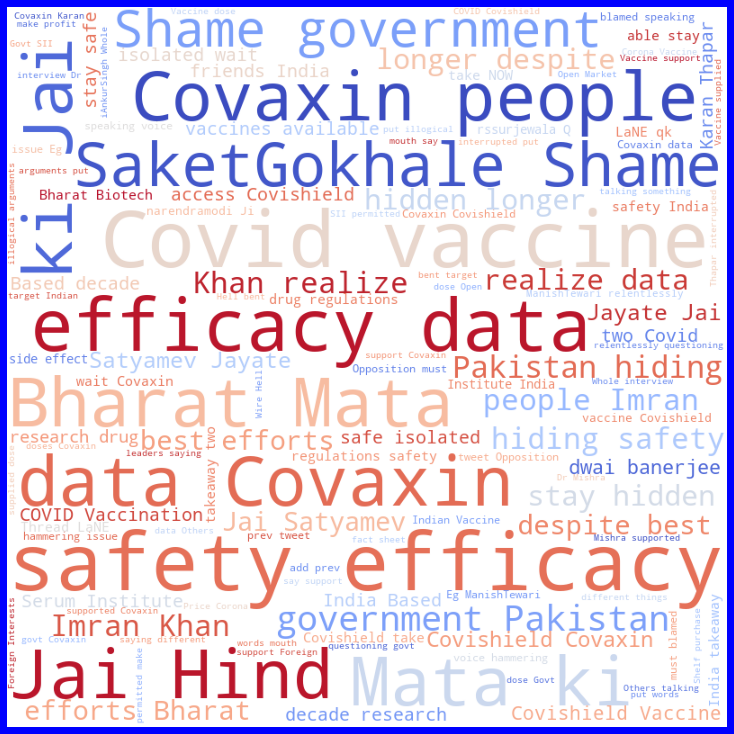

In [729]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap = 'coolwarm',
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(' '.join(df['tweet'])) 
  
plt.figure(figsize = (16, 10), facecolor = 'blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [730]:
px.scatter(x='published',y='Sentiment Compund Score', data_frame=df, color='Sentiment Category', template="simple_white")

## Emotion Analysis

* For emotion analysis we are using an external dataset to build amultinomial NB classifier. The dataset is saved as emotion.csv

In [763]:
emotion = pd.read_csv('Emotion.csv', encoding='unicode_escape') ## reading the emotion.csv files containing about 3000 labelled text data

In [764]:
emotion.head()

,id,Text,Emotion,confidence
0,30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
1,30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
2,30002,Been waiting all week for this game ?????? #ch...,joy,0.940
3,30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
4,30004,I feel so blessed to work with the family that...,joy,0.938


In [765]:
type(emotion['confidence'][0])

numpy.float64

In [766]:
emotion.shape

(2693, 4)

In [767]:
emotion.isnull().sum()

id              0
Text           54
Emotion       162
confidence    270
dtype: int64

In [768]:
emotion.dropna(inplace=True)

In [769]:
emotion['Emotion'].value_counts()

fear       807
joy        783
sadness    751
anger       82
Name: Emotion, dtype: int64

In [770]:
emotion.shape

(2423, 4)

In [771]:
emotion['confidence'] = emotion['confidence'].astype('float64') 

In [772]:
emotion_conf = emotion[emotion['confidence'].astype('float64')  > 0.70]

In [773]:
emotion_conf['Emotion'].value_counts()

joy        138
fear       135
sadness    121
anger       82
Name: Emotion, dtype: int64

In [774]:
emotion_conf.isnull().sum()

id            0
Text          0
Emotion       0
confidence    0
dtype: int64

In [775]:
emotion_conf.drop('id', inplace=True, axis=1)
emotion_conf['Emotion'] = emotion_conf['Emotion'].map({'joy':0, 'anger':1, 'fear':2, 'sadness':3})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-775-549b8f1510df>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



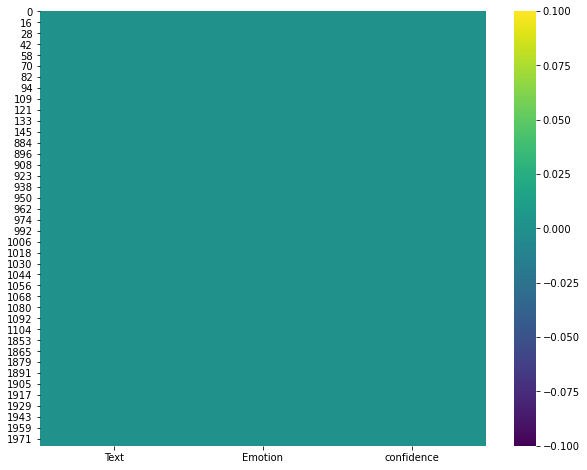

In [776]:
plt.figure(figsize=(10,8))
sns.heatmap(emotion_conf.isnull(), cmap='viridis')

### Now this is a multi class classification problem
0 = Joy
1 = Anger
2 = Fear
3 = Sadness

In [777]:
emotion_conf.head()

,Text,Emotion,confidence
0,Just got back from seeing @GaryDelaney in Burs...,0,0.980
1,Oh dear an evening of absolute hilarity I don'...,0,0.958
2,Been waiting all week for this game ?????? #ch...,0,0.940
3,"@gardiner_love : Thank you so much, Gloria! Yo...",0,0.938
4,I feel so blessed to work with the family that...,0,0.938


In [778]:
ps = PorterStemmer()
def clean_text(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",review).split()) #to remove urls, user profiles and puncuations
    
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [779]:
emotion_conf['Text'] = emotion_conf['Text'].apply(clean_text)

<ipython-input-779-c073b2249533>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [780]:
from sklearn.model_selection import train_test_split

In [781]:
X = emotion_conf.Text
y = emotion_conf.Emotion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [782]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [783]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [784]:
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [785]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = nb.predict(X_test)

In [786]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred)) ## Achieving 80% accuracy

accuracy 0.7062937062937062
              precision    recall  f1-score   support

           0       0.91      0.82      0.87        51
           1       1.00      0.19      0.32        21
           2       0.48      0.94      0.64        33
           3       0.83      0.63      0.72        38

    accuracy                           0.71       143
   macro avg       0.81      0.65      0.64       143
weighted avg       0.80      0.71      0.69       143



### Now we can apply this emotion classifier to our original dataset

In [755]:
df['Emotion'] = df['tweet'].apply(lambda x: nb.predict([x]))
df['Emotion'] = df['Emotion'].apply(lambda x: x[0])
df['Emotion'] = df['Emotion'].map({0:'joy',1:'anger',2:'fear',3:'sadness'})

In [756]:
df.tail()

,published,content,extra_article_attributes.world_data.city,extra_author_attributes.name,extra_author_attributes.gender,extra_author_attributes.short_name,extra_author_attributes.world_data.region,extra_author_attributes.world_data.city,extra_author_attributes.world_data.longitude,extra_author_attributes.world_data.latitude,...,generator.type,source_extended_attributes.alexa_unique_visitors,article_extended_attributes.twitter_likes,extra_author_attributes.description,extra_source_attributes.name,word_count,tweet,Sentiment Compund Score,Sentiment Category,Emotion
5457,2021-01-18 13:21:45,#Covishield #CoronaVaccine https://t.co/eVoEIr...,Chennai,சம்பத்,MALE,sampath2605,Tamil Nadu,Chennai,80.282593,13.087463,...,MOBILE_ANDROID,191844656,1,No Description,சம்பத்,3,Covishield CoronaVaccine eVoEIrAhOH,0.0000,neg,fear
5458,2021-01-17 21:37:52,RT @SaketGokhale: To add to my prev. tweet: Op...,Chennai,Umang Khanna,MALE,UmangKhanna10,Tamil Nadu,Chennai,80.282593,13.087463,...,MOBILE_ANDROID,191844656,0,Indian 🇮🇳 \nVisionary Leader 🤟🏼\n\n◾Work- Inte...,Umang Khanna,47,SaketGokhale To add prev tweet Opposition must...,-0.5423,neg,fear
5459,2021-01-18 13:54:31,RT @the_fauxy: After No Side Effect Of Covaxin...,Mehsana,Shailya Gandhi,MALE,Shail006,Gujarat,Mehsana,72.405396,23.601379,...,MOBILE_ANDROID,191844656,0,No Description,Shailya Gandhi,22,fauxy After No Side Effect Of Covaxin Liberal ...,-0.2960,neg,fear
5460,2021-01-18 17:32:55,Tibetan health workers receive #Covishield vac...,Dharamsala,Voice Of Tibet,UNKNOWN,VOT_Tibetan,Himachal Pradesh,Dharamsala,76.316528,32.220154,...,MOBILE_OTHER,191844656,0,Independent shortwave Radio News Service,Voice Of Tibet,6,Tibetan health workers receive Covishield vacc...,0.0000,neg,sadness
5461,2021-01-18 18:40:43,RT @TheSignalDotCo: We've all heard stories of...,Delhi,Aman Rawat 🚦,MALE,rawtaman,Delhi,Delhi,77.228394,28.671570,...,MOBILE_ANDROID,191844656,0,Journalist. Tweets are personal. IIMCian.\nByl...,Aman Rawat 🚦,43,TheSignalDotCo We heard stories two brothers t...,-0.2547,neg,fear


Text(0.5, 1.0, 'Emotion Analysis of the tweets')

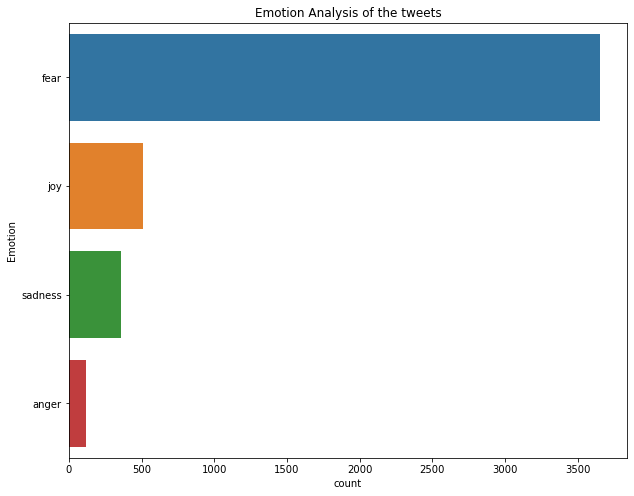

In [787]:
plt.figure(figsize=(10,8))
sns.countplot(y='Emotion',data=df)
plt.title('Emotion Analysis of the tweets')

# Fears regarding the vaccines are very obvious in this analysis

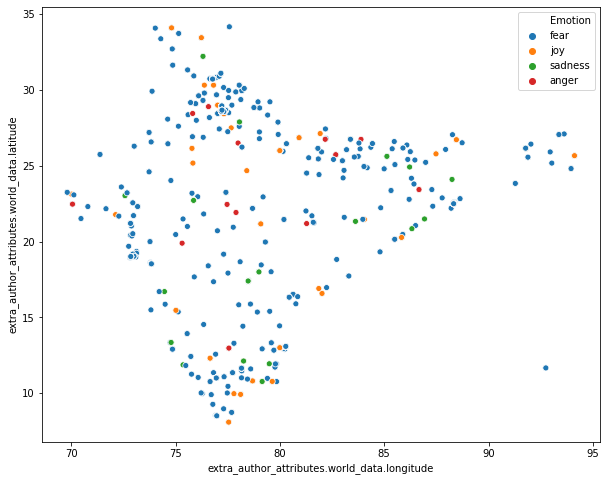

In [758]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='extra_author_attributes.world_data.longitude',y='extra_author_attributes.world_data.latitude', data=df, hue='Emotion')

Text(0.5, 1.0, 'Gender Wise Emotion Analysis')

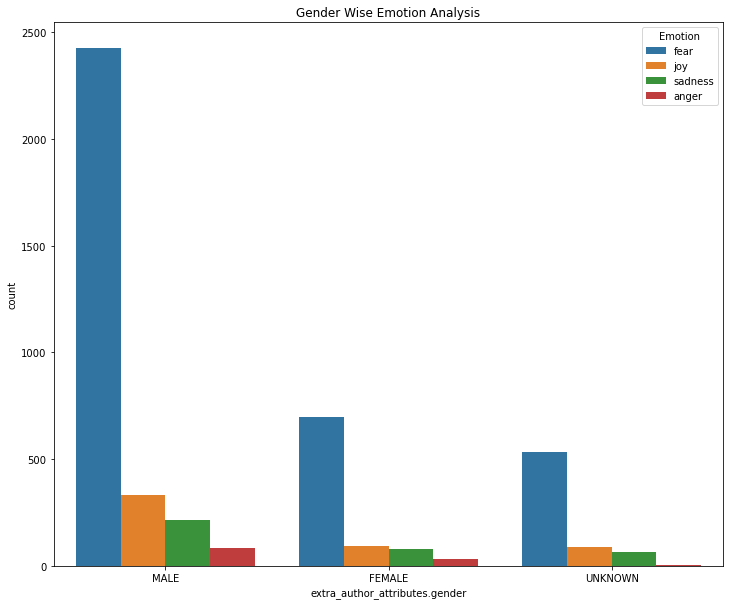

In [759]:
plt.figure(figsize=(12,10))
sns.countplot(x='extra_author_attributes.gender', data=df, hue='Emotion')
plt.title('Gender Wise Emotion Analysis')

Text(0.5, 1.0, 'Device Wise Emotion Analysis')

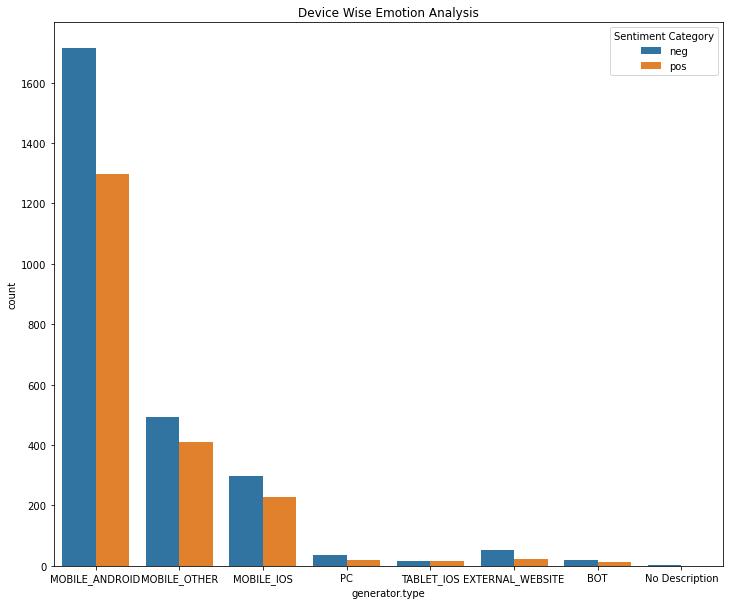

In [760]:
plt.figure(figsize=(12,10))
sns.countplot(x='generator.type', data=df, hue='Sentiment Category')
plt.title('Device Wise Emotion Analysis')

## Topic Modelling

In [761]:
tfidf = TfidfVectorizer()

In [762]:
dtm = tfidf.fit_transform(df['tweet'])

In [373]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [502]:
nmf = NMF(n_components=4, random_state=42)

nmf.fit(dtm)

for index,topic in enumerate(nmf.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')


THE TOP 10 WORDS FOR TOPIC #0
['best', 'hiding', 'shame', 'satyamev', 'realize', 'longer', 'imran', 'jayate', 'data', 'jai']


THE TOP 10 WORDS FOR TOPIC #1
['thread', 'research', 'friends', 'qk', 'isolated', 'decade', 'takeaway', 'regulations', 'lane', 'india']


THE TOP 10 WORDS FOR TOPIC #2
['covishield', 'govt', 'covaxin', 'profit', 'rssurjewala', 'put', 'support', 'why', 'dose', 'vaccine']


THE TOP 10 WORDS FOR TOPIC #3
['talking', 'things', 'issue', 'something', 'speaking', 'eg', 'add', 'hammering', 'relentlessly', 'blamed']




### Above are the 4 topics generated by NMF , after reading the keywords carefully we can give them a suitable title

In [790]:
topic_results = nmf.transform(dtm)

In [791]:
topic_results.argmax(axis=1)

array([2, 1, 2, ..., 3, 1, 1], dtype=int64)

In [792]:
df['Topic'] = topic_results.argmax(axis=1)

In [793]:
df['Topic'] = df['Topic'].map({0:'Indo-Pak Politics',1:'Vaccine',2:'Government',3:'blame-game'})

In [794]:
df.head()

,published,content,extra_article_attributes.world_data.city,extra_author_attributes.name,extra_author_attributes.gender,extra_author_attributes.short_name,extra_author_attributes.world_data.region,extra_author_attributes.world_data.city,extra_author_attributes.world_data.longitude,extra_author_attributes.world_data.latitude,...,source_extended_attributes.alexa_unique_visitors,article_extended_attributes.twitter_likes,extra_author_attributes.description,extra_source_attributes.name,word_count,tweet,Sentiment Compund Score,Sentiment Category,Emotion,Topic
0,2021-01-18 00:44:48,RT @sadhika_tiwari: A 46-year-old dies after v...,Uttar Pradesh,Piyush Rai,MALE,Benarasiyaa,Uttar Pradesh,Uttar Pradesh,79.996948,26.001892,...,191844656,0,Journalist,Piyush Rai,16,sadhika tiwari A year old dies vaccination Mur...,0.0000,neg,fear,Government
1,2021-01-18 20:21:12,RT @mid_day: #MiddayNews | Consent form for #C...,New Delhi,Sheela Panicker,FEMALE,SheelaPanicker,Delhi,New Delhi,77.195435,28.600159,...,191844656,0,"#Entrepreneur, #Investor, #Marketer",Sheela Panicker,18,mid day MiddayNews Consent form Covaxin shot c...,0.2263,pos,joy,Vaccine
2,2021-01-18 00:14:08,RT @Piyu_Nair: @Saltpistachio Covishield!,Maharashtra,Devangbhai B Patel,MALE,BDevangbhai,Maharashtra,Maharashtra,72.822876,18.959656,...,191844656,0,"HANSKAMAL TOWER, DONDAICHA",Devangbhai B Patel,4,Piyu Nair Saltpistachio Covishield,0.0000,neg,fear,Government
3,2021-01-18 08:09:34,RT @TimesNow: #Breaking | Bharat Biotech to pa...,Maharashtra,PAPLU DYNASTY ⚔️,FEMALE,firepaplu,Maharashtra,Maharashtra,72.822876,18.959656,...,191844656,0,UPSC-CAPF aspirant..🇮🇳\nmy behavior is just li...,PAPLU DYNASTY ⚔️,18,TimesNow Breaking Bharat Biotech pay mpensatio...,-0.1027,neg,sadness,Government
4,2021-01-18 15:41:42,RT @the_fauxy: After No Side Effect Of Covaxin...,Telangana,Taraktogenos,FEMALE,Taraktogenos,Andhra Pradesh,Telangana,78.997192,17.998352,...,191844656,0,Ex-secular | Unapologetic Civilizational Hindu...,Taraktogenos,22,fauxy After No Side Effect Of Covaxin Liberal ...,-0.2960,neg,fear,blame-game


In [795]:
result = df[['published','content','tweet','Sentiment Compund Score','Sentiment Category','Emotion','Topic']]
result.to_csv('result.csv')

Text(0.5, 1.0, 'Topic Modelling of Tweets')

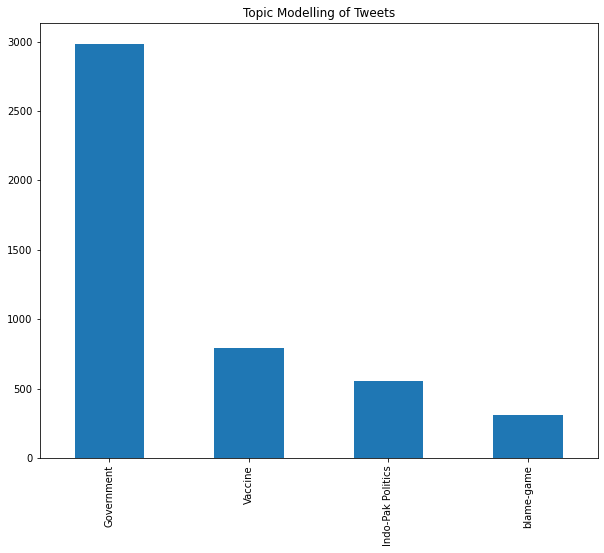

In [590]:
plt.figure(figsize=(10,8))
df['Topic'].value_counts().plot(kind='bar')
plt.title('Topic Modelling of Tweets')

Text(0.5, 1.0, 'Topic-wise Sentiment Analysis')

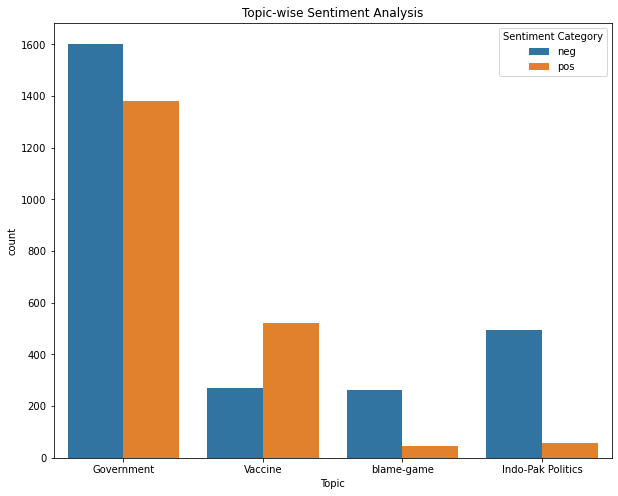

In [522]:
plt.figure(figsize=(10,8))
sns.countplot(x='Topic', data=df, hue='Sentiment Category')
plt.title('Topic-wise Sentiment Analysis')

### Some Insights and Conclusions:

* More inclusive ads and campaigns for states around central and North East India as there is less social media activity from these regions.

* Need of the hour is to depoliticize the entire campaign as more and more people are talking about How the government is benfetting from the Vaccine rather than the effectiveness of the vaccine.

* Measures should be taken to make sure this nobel cause of vaccination doesn't take a communal angle.

* ABC corp should be upfront about if there has been any misunderstanding or miscommunication regarding side-effects of the vaccine.

### Thank you !